In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enable plots inside the Jupyter NotebookLet the
%matplotlib inline

In [2]:
def update_H(W, H, V):
    numerator = W.T.dot(V)
    denominator = W.T.dot(W).dot(H) + 1e-10
    H = H*(numerator / denominator)
    return H

def update_W(W, H, V):
    numerator = V.dot(H.T)
    denominator = W.dot(H).dot(H.T) + 1e-10
    W = W*(numerator / denominator)
    return W

In [3]:
def do_nnmf(V, rank=15, iter=100):

    # Initialize
    n, m = V.shape

    W = np.abs(np.random.randn(1, n, rank))[0]
    H = np.abs(np.random.randn(1, rank, m))[0]

    loss = []
    for i in range(iter):
        H = update_H(W, H, V)
        W = update_W(W, H, V)

        loss.append(sum((V - W.dot(H)).flatten()**2))

    return H, W, loss

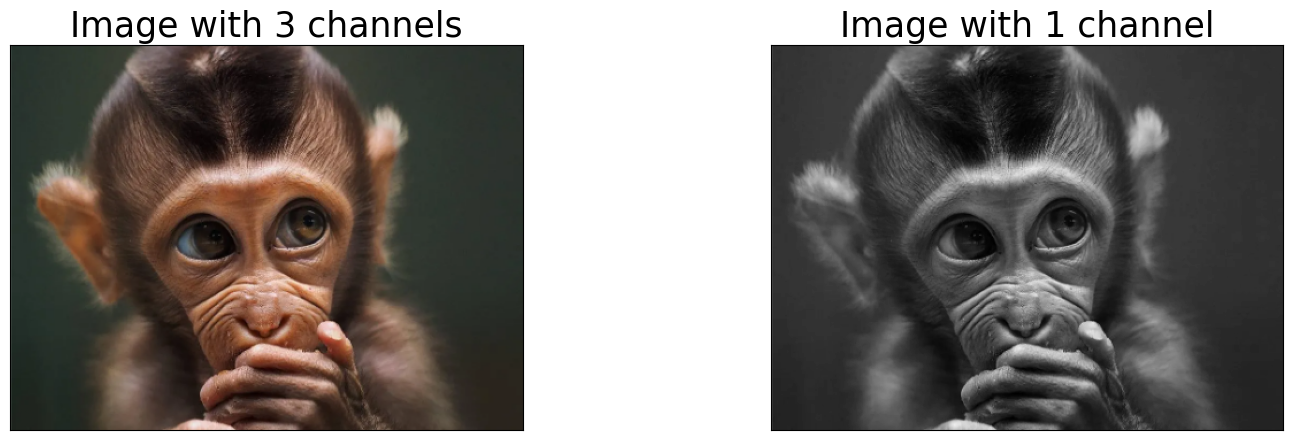

In [4]:
img = plt.imread("Monkey.png")
V = img[:, :, 1] # only use one color channel

# Visualize the image
fig, ax = plt.subplots(1, 2, figsize=[18, 5])

ax[0].imshow(img)
ax[0].set_title('Image with 3 channels', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_title('Image with 1 channel',fontsize=25)
ax[1].imshow(V, cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

In [5]:
H, W, loss = do_nnmf(V, rank=15, iter=300)

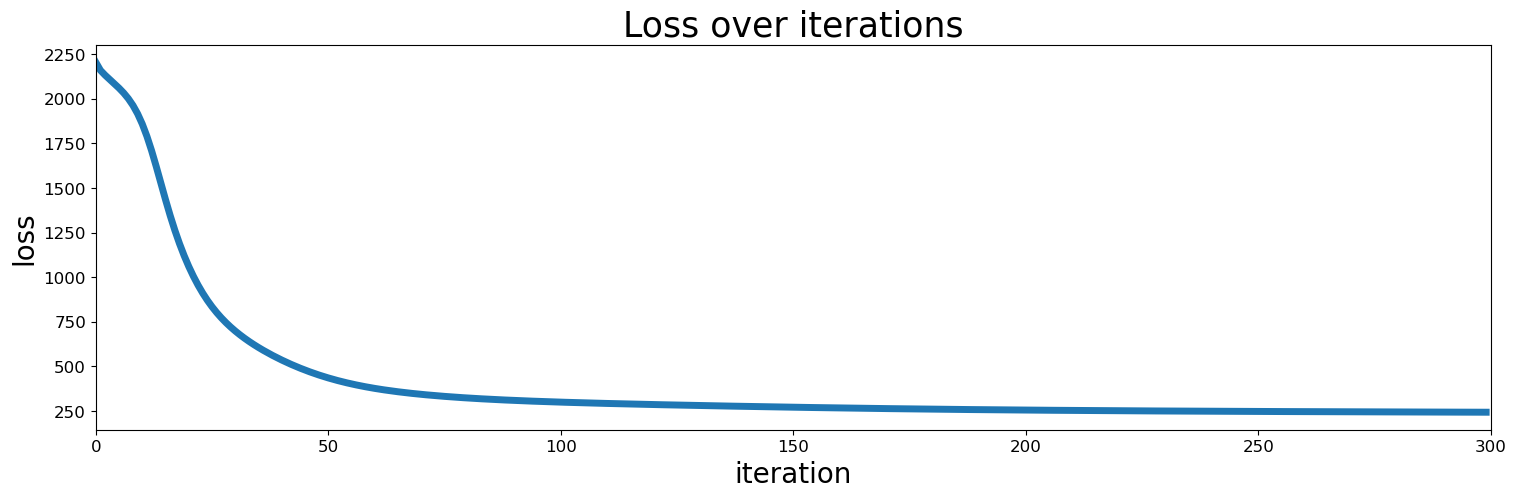

In [6]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

ax.plot(loss, lw=5)
ax.set_title('Loss over iterations', fontsize=25)
ax.tick_params(labelsize=12)
ax.set_xlim(0, 300)
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('loss', fontsize=20)

plt.show()

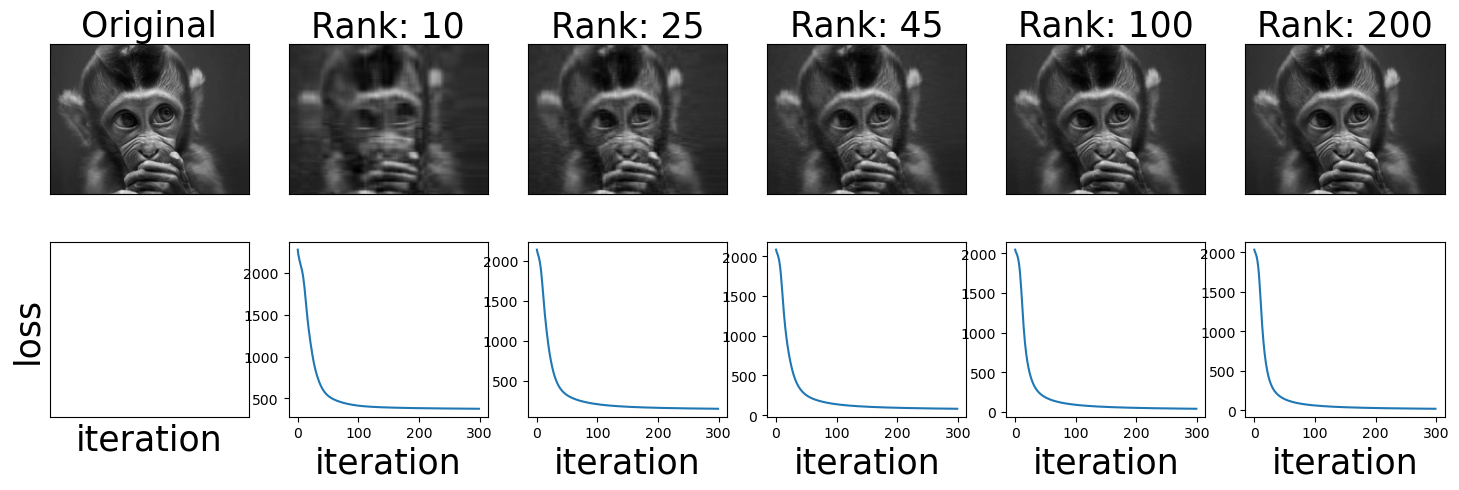

In [7]:
ranks_to_test = [10, 25, 45, 100, 200]

n_plots = len(ranks_to_test) + 1
fig, ax = plt.subplots(2, n_plots, figsize=[18, 5])

# Plot original image as reference
ax[0][0].imshow(V, cmap='gray')
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Original', fontsize=25)

ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set_xlabel('iteration', fontsize=25)
ax[1][0].set_ylabel('loss', fontsize=25)

data_points_original = V.shape[0] * V.shape[1]

data_points = []

n = 1
for i in ranks_to_test:

    H, W, loss = do_nnmf(V, rank=i, iter=300)

    # Reconstruct the image from W and H
    V_rec = W.dot(H)

    data_points.append((H.shape[0] * H.shape[1]) + (W.shape[0] * W.shape[1]))

    ax[0][n].imshow(V_rec, cmap='gray')
    ax[0][n].set_xticks([])
    ax[0][n].set_yticks([])
    ax[0][n].set_title('Rank: {}'.format(i), fontsize=25)

    ax[1][n].plot(loss)
    ax[1][n].set_xlabel('iteration', fontsize=25)

    n += 1

plt.show()

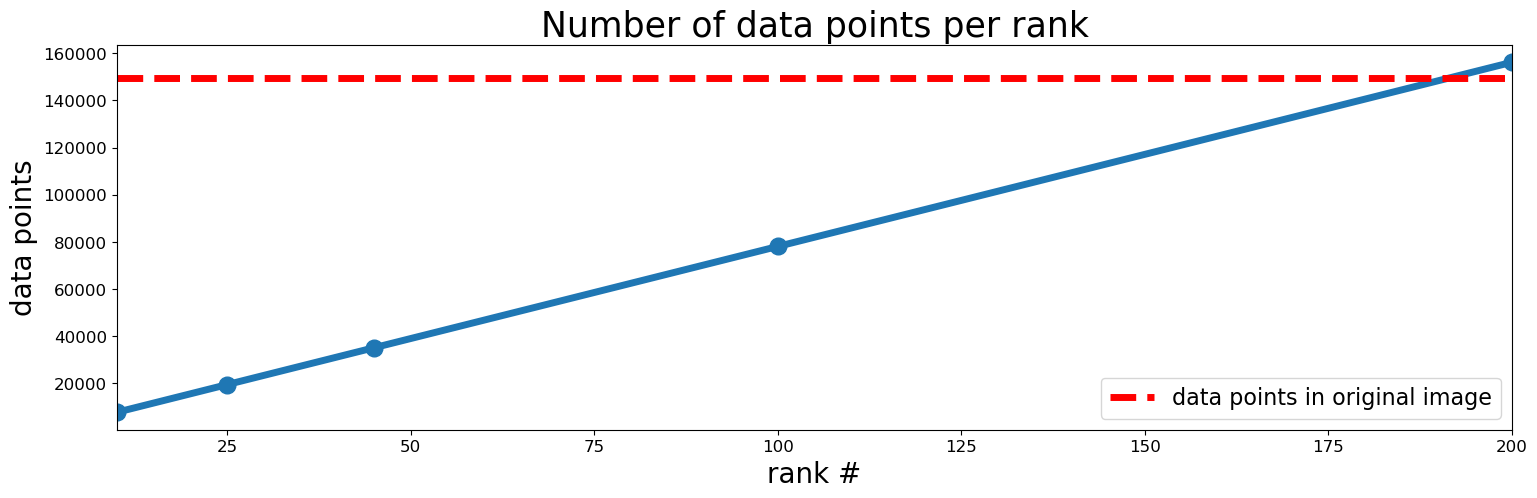

In [8]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

ax.plot(ranks_to_test, data_points, marker='o', lw=5, markersize=12)
ax.plot((ranks_to_test[0], ranks_to_test[-1]),
        (data_points_original, data_points_original),
        'r--', lw=5,
        label='data points in original image')

ax.set_title('Number of data points per rank', fontsize=25)
ax.tick_params(labelsize=12)
ax.set_xlim(ranks_to_test[0], ranks_to_test[-1])
ax.set_xlabel('rank #', fontsize=20)
ax.set_ylabel('data points', fontsize=20)
ax.legend(fontsize=16)

plt.show()

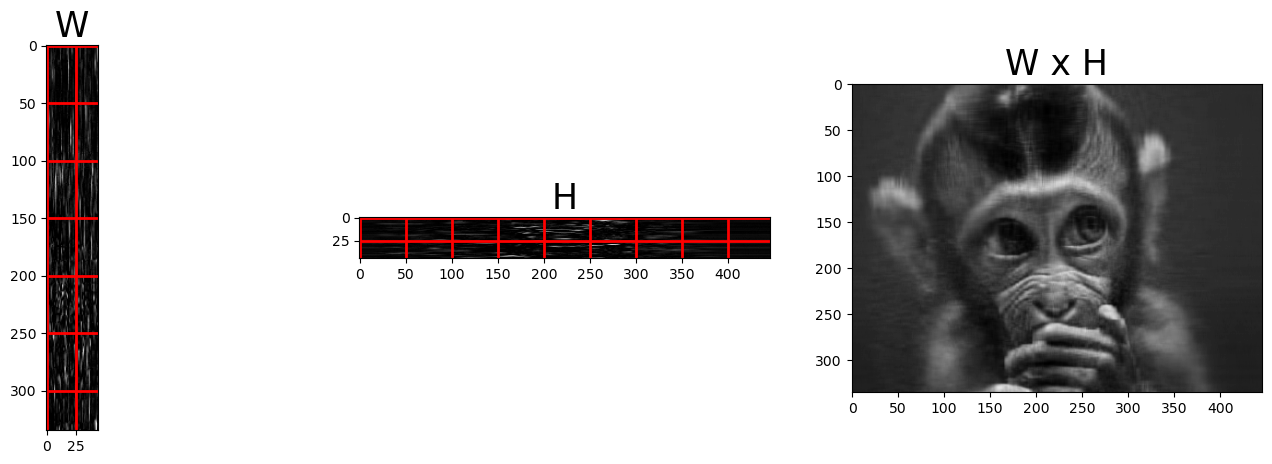

In [9]:
H, W, _ = do_nnmf(V, rank=45, iter=300)
V_rec = W.dot(H)

fig, ax = plt.subplots(1, 3, figsize=[18, 5])

ax[0].imshow(W, cmap='gray')
ax[0].grid(color='r', linestyle='-', linewidth=2)
ax[0].set_title('W', fontsize=25)

ax[1].imshow(H, cmap='gray')
ax[1].grid(color='r', linestyle='-', linewidth=2)
ax[1].set_title('H', fontsize=25)

ax[2].imshow(V_rec, cmap='gray')
ax[2].set_title('W x H', fontsize=25)

plt.show()